In [1]:
import tensorflow as tf
import numpy as np
import tensorflow_probability as tfp
import nnqs
import sampler
from hamiltonian import Ising1D, TFIH
import optimizer

# disable gpu as the optimizer do not work with the complex valued gradients
tf.config.set_visible_devices([], 'GPU')


2025-07-14 21:08:42.854439: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752520122.877226  182730 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752520122.883769  182730 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1752520122.900159  182730 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1752520122.900181  182730 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1752520122.900184  182730 computation_placer.cc:177] computation placer alr

In [2]:
L = 8
n_spins = L * L
density = 4
n_hidden_spins = int(L * density)

In [3]:
wave_1 = nnqs.RBM(n_visible=L, n_hidden=n_hidden_spins, std_visible=0.01, std_hidden=0.01, std_weights=0.01)

a_4 = tf.identity(wave_1.a)
b_4 = tf.identity(wave_1.b)
W_4 = tf.identity(wave_1.W)

m_sampler_1 = sampler.GibbsSampler(n_visible=L, n_hidden=n_hidden_spins, k=10, batch_size=200)
#print("Initial state:", m_sampler.current_state)

ham = TFIH(L=L, J=-1.0, h=0.0)

opt_1 = optimizer.StochasticReconfiguration(
    wave_function=wave_1,
    hamiltonian=ham,
    sampler=m_sampler_1,
    learning_rate=0.01,
    epsilon=0.001,
)

In [4]:
results_sr = opt_1.train(n_iterations=1000)

/home/steve/projects/nnqs/tf-gpu-venv/lib64/python3.12/site-packages/tensorflow/python/framework/ops.py:315: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(self._numpy())


Iteration 0: Energy = -0.140000+0.000000j, Variance = 8.700398+0.000000j
Iteration 1: Energy = -0.040000+0.000000j, Variance = 9.918400+0.000000j
Iteration 2: Energy = 0.120000+0.000000j, Variance = 7.505599+0.000000j
Iteration 3: Energy = 0.040000+0.000000j, Variance = 8.478401+0.000000j
Iteration 4: Energy = -0.400000+0.000000j, Variance = 8.640000+0.000000j
Iteration 5: Energy = 0.020000+0.000000j, Variance = 9.359600+0.000000j
Iteration 6: Energy = 0.120000+0.000000j, Variance = 7.985600+0.000000j
Iteration 7: Energy = 0.100000+0.000000j, Variance = 7.750000+0.000000j
Iteration 8: Energy = -0.160000+0.000000j, Variance = 7.814399+0.000000j
Iteration 9: Energy = 0.040000+0.000000j, Variance = 7.358400+0.000000j
Iteration 10: Energy = -0.100000+0.000000j, Variance = 6.310000+0.000000j
Iteration 11: Energy = -0.300000+0.000000j, Variance = 8.950001+0.000000j
Iteration 12: Energy = -0.340000+0.000000j, Variance = 7.164401+0.000000j
Iteration 13: Energy = -0.380000+0.000000j, Variance =

In [5]:
# plot the results
import matplotlib.pyplot as plt

In [6]:
#print(m_sampler.sample(wave)[0])
print(m_sampler_1.sample(wave_1)[0])
#print(m_sampler_1.sample(wave_1))
energies = ham.local_energy(m_sampler_1.current_state, wave_1)
mean = tf.reduce_mean(energies)
variance = tf.math.reduce_variance(energies)
print("Mean energy:", mean.numpy())
print("Variance:", variance.numpy())

tf.Tensor([1. 0. 1. 0. 1. 0. 1. 0.], shape=(8,), dtype=float32)
Mean energy: (-8+0j)
Variance: 0.0


In [7]:
L = 8
n_spins = L * L
density = 2
n_hidden_spins = int(L * density)

In [8]:
wave_2 = nnqs.RBM(n_visible=L, n_hidden=n_hidden_spins, std_visible=0.01, std_hidden=0.01, std_weights=0.01)
m_sampler_2 = sampler.GibbsSampler(n_visible=L, n_hidden=n_hidden_spins, k=5, batch_size=100)

a_2 = tf.identity(wave_2.a)
b_2 = tf.identity(wave_2.b)
W_2 = tf.identity(wave_2.W)

opt_2 = optimizer.StochasticReconfiguration(
    wave_function=wave_2,
    hamiltonian=ham,
    sampler=m_sampler_2,
    learning_rate=0.01,
    epsilon=0.001,
)

In [9]:
results_sr_2 = opt_2.train(n_iterations=1000)

Iteration 0: Energy = -0.080000+0.000000j, Variance = 7.673600+0.000000j
Iteration 1: Energy = 0.120000+0.000000j, Variance = 7.505600+0.000000j
Iteration 2: Energy = -0.480000+0.000000j, Variance = 7.449600+0.000000j
Iteration 3: Energy = 0.280000+0.000000j, Variance = 8.081600+0.000000j
Iteration 4: Energy = -0.120000+0.000000j, Variance = 7.505600+0.000000j
Iteration 5: Energy = -0.160000+0.000000j, Variance = 7.654399+0.000000j
Iteration 6: Energy = -0.240000+0.000000j, Variance = 8.262400+0.000000j
Iteration 7: Energy = 0.320000+0.000000j, Variance = 6.617600+0.000000j
Iteration 8: Energy = 0.080000+0.000000j, Variance = 7.353600+0.000000j
Iteration 9: Energy = -0.320000+0.000000j, Variance = 6.937601+0.000000j
Iteration 10: Energy = 0.080000+0.000000j, Variance = 7.993600+0.000000j
Iteration 11: Energy = -0.440000+0.000000j, Variance = 7.326400+0.000000j
Iteration 12: Energy = -0.200000+0.000000j, Variance = 8.120000+0.000000j
Iteration 13: Energy = 0.160000+0.000000j, Variance =

In [10]:
print(m_sampler_2.sample(wave_2)[0])
energies = ham.local_energy(m_sampler_2.current_state, wave_2)
mean = tf.reduce_mean(energies)
variance = tf.math.reduce_variance(energies)
print("Mean energy:", mean.numpy())
print("Variance:", variance.numpy())

tf.Tensor([0. 1. 0. 1. 0. 1. 0. 1.], shape=(8,), dtype=float32)
Mean energy: (-7.96+0j)
Variance: 0.1584


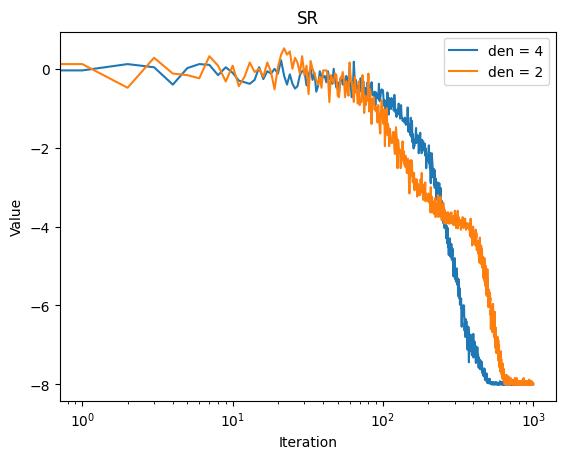

In [11]:
plt.xscale('log')
#plt.plot(results_vmc['energies'], label='Energy VMC', color='blue')
plt.title("SR")
plt.plot(results_sr['energies'], label='den = 4')
plt.plot(results_sr_2['energies'], label='den = 2')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.show()

In [12]:
L = 8
n_spins = L * L
density = 4
n_hidden_spins = int(L * density)

In [13]:
print(wave_1.a.numpy())
print(a_4.numpy())


[ 0.6346242 -0.00478741j -0.53280586-0.00746529j  0.44943404-0.00448445j
 -2.5731623 +0.00749196j  2.4147522 +0.00593171j -1.813528  -0.00572633j
  2.5452728 +0.01003101j -2.1045735 -0.01173358j]
[ 0.00393974-0.00478741j -0.00026438-0.00746529j  0.00466191-0.00448445j
 -0.00706901+0.00749196j -0.00332362+0.00593171j  0.01397701-0.00572633j
 -0.01329473+0.01003101j  0.00409389-0.01173358j]


In [14]:
wave_3 = nnqs.RBM(n_visible=L, n_hidden=n_hidden_spins)
m_sampler_3 = sampler.GibbsSampler(n_visible=L, n_hidden=n_hidden_spins, k=5, batch_size=100)

wave_3.a.assign(a_4)
wave_3.b.assign(b_4)
wave_3.W.assign(W_4)

opt_3 = optimizer.VMC(
    wave_function=wave_3,
    hamiltonian=ham,
    sampler=m_sampler_3,
    learning_rate=0.01,
)

In [15]:
print(wave_1.a.numpy())
print(a_4.numpy())

[ 0.6346242 -0.00478741j -0.53280586-0.00746529j  0.44943404-0.00448445j
 -2.5731623 +0.00749196j  2.4147522 +0.00593171j -1.813528  -0.00572633j
  2.5452728 +0.01003101j -2.1045735 -0.01173358j]
[ 0.00393974-0.00478741j -0.00026438-0.00746529j  0.00466191-0.00448445j
 -0.00706901+0.00749196j -0.00332362+0.00593171j  0.01397701-0.00572633j
 -0.01329473+0.01003101j  0.00409389-0.01173358j]


In [16]:
result_vmc = opt_3.train(n_iterations=1000)

Iteration 0: Energy = 0.120000+0.000000j, Variance = 8.785600+0.000000j
Iteration 1: Energy = -0.080000+0.000000j, Variance = 8.313600+0.000000j
Iteration 2: Energy = -0.520000+0.000000j, Variance = 8.529600+0.000000j
Iteration 3: Energy = 0.280000+0.000000j, Variance = 6.801600+0.000000j
Iteration 4: Energy = 0.040000+0.000000j, Variance = 6.558400+0.000000j
Iteration 5: Energy = 0.480000+0.000000j, Variance = 6.169600+0.000000j
Iteration 6: Energy = 0.320000+0.000000j, Variance = 8.217600+0.000000j
Iteration 7: Energy = 0.040000+0.000000j, Variance = 9.118400+0.000000j
Iteration 8: Energy = -0.080000+0.000000j, Variance = 8.313600+0.000000j
Iteration 9: Energy = -0.320000+0.000000j, Variance = 6.937600+0.000000j
Iteration 10: Energy = -0.080000+0.000000j, Variance = 8.953600+0.000000j
Iteration 11: Energy = -0.160000+0.000000j, Variance = 7.334401+0.000000j
Iteration 12: Energy = -0.120000+0.000000j, Variance = 6.225600+0.000000j
Iteration 13: Energy = -0.360000+0.000000j, Variance =

In [17]:
print(m_sampler_3.sample(wave_3)[0])
energies = ham.local_energy(m_sampler_3.current_state, wave_3)
print(energies[0])
print(energies[10])
mean = tf.reduce_mean(energies)
variance = tf.math.reduce_variance(energies)
print("Mean energy:", mean.numpy())
print("Variance:", variance.numpy())

tf.Tensor([1. 0. 1. 0. 1. 0. 1. 0.], shape=(8,), dtype=float32)
tf.Tensor((-8+0j), shape=(), dtype=complex64)
tf.Tensor((-8+0j), shape=(), dtype=complex64)
Mean energy: (-8+0j)
Variance: 0.0


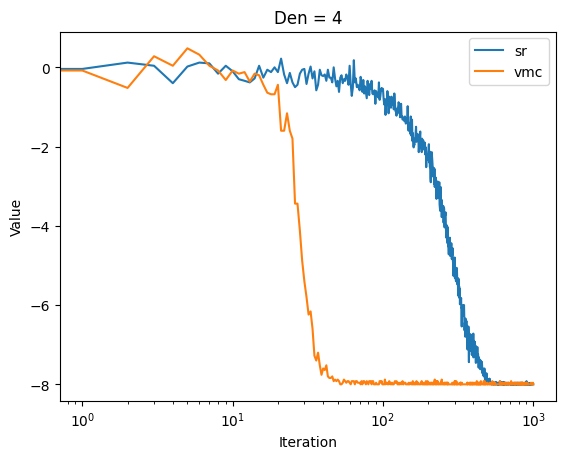

In [18]:
plt.xscale('log')
plt.title("Den = 4")
plt.plot(results_sr['energies'], label='sr')
plt.plot(result_vmc['energies'], label='vmc')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.show()

In [19]:
L = 8
n_spins = L * L
density = 2
n_hidden_spins = int(L * density)

In [20]:
wave_4 = nnqs.RBM(n_visible=L, n_hidden=n_hidden_spins)
m_sampler_4 = sampler.GibbsSampler(n_visible=L, n_hidden=n_hidden_spins, k=5, batch_size=100)

wave_4.a.assign(a_2)
wave_4.b.assign(b_2)
wave_4.W.assign(W_2)

opt_4 = optimizer.VMC(
    wave_function=wave_4,
    hamiltonian=ham,
    sampler=m_sampler_4,
    learning_rate=0.01,
)

In [21]:
result_vmc_2 = opt_4.train(n_iterations=1000)

Iteration 0: Energy = -0.520000+0.000000j, Variance = 7.569600+0.000000j
Iteration 1: Energy = 0.280000+0.000000j, Variance = 7.441600+0.000000j
Iteration 2: Energy = -0.080000+0.000000j, Variance = 7.033600+0.000000j
Iteration 3: Energy = 0.080000+0.000000j, Variance = 7.353600+0.000000j
Iteration 4: Energy = -0.040000+0.000000j, Variance = 6.878400+0.000000j
Iteration 5: Energy = -0.040000+0.000000j, Variance = 8.158400+0.000000j
Iteration 6: Energy = -0.240000+0.000000j, Variance = 6.982400+0.000000j
Iteration 7: Energy = 0.320000+0.000000j, Variance = 9.817600+0.000000j
Iteration 8: Energy = -0.280000+0.000000j, Variance = 5.521600+0.000000j
Iteration 9: Energy = -0.080000+0.000000j, Variance = 6.073600+0.000000j
Iteration 10: Energy = -0.080000+0.000000j, Variance = 7.993600+0.000000j
Iteration 11: Energy = -0.200000+0.000000j, Variance = 6.520000+0.000000j
Iteration 12: Energy = 0.120000+0.000000j, Variance = 9.425600+0.000000j
Iteration 13: Energy = 0.080000+0.000000j, Variance 

In [22]:
print(m_sampler_4.sample(wave_4)[0])
energies = ham.local_energy(m_sampler_4.current_state, wave_4)
mean = tf.reduce_mean(energies)
variance = tf.math.reduce_variance(energies)
print("Mean energy:", mean.numpy())
print("Variance:", variance.numpy())

tf.Tensor([0. 1. 0. 1. 0. 1. 0. 1.], shape=(8,), dtype=float32)
Mean energy: (-8+0j)
Variance: 0.0


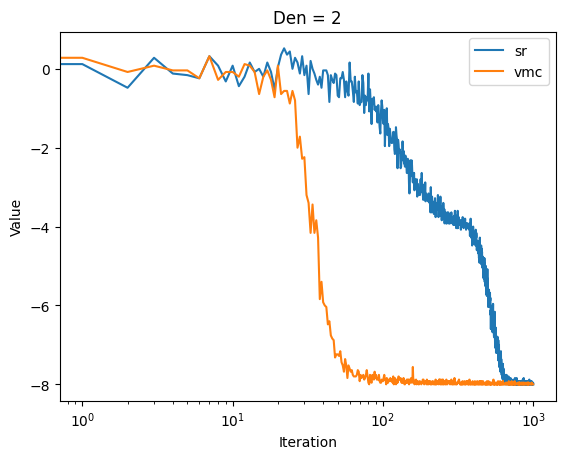

In [23]:
plt.xscale('log')
plt.title("Den = 2")
plt.plot(results_sr_2['energies'], label='sr')
plt.plot(result_vmc_2['energies'], label='vmc')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.show()

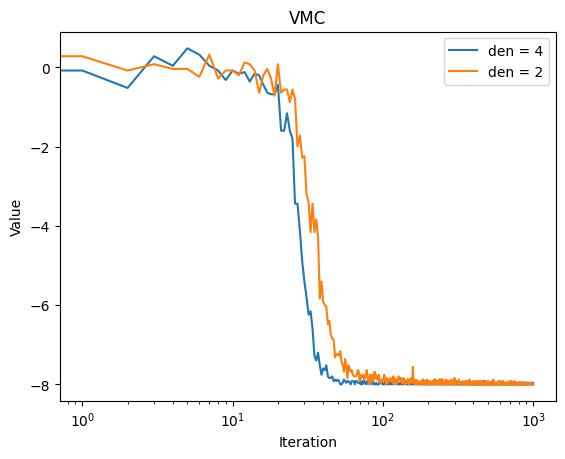

In [24]:
plt.xscale('log')
plt.title("VMC")
plt.plot(result_vmc['energies'], label='den = 4')
plt.plot(result_vmc_2['energies'], label='den = 2')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.show()

In [25]:
diff_wave_a = wave_1.a - wave_3.a
diff_wave_b = wave_1.b - wave_3.b
diff_wave_W = wave_1.W - wave_3.W
print(diff_wave_a.numpy())
print(diff_wave_b.numpy())
print(diff_wave_W.numpy())

[ 0.26863652+0.j -0.12210196+0.j -0.00298339+0.j -2.117578  +0.j
  1.9051707 +0.j -1.4221866 +0.j  2.165549  +0.j -1.6353545 +0.j]
[-0.5977713 +0.j  0.04060453+0.j -0.68728626+0.j -0.15232004+0.j
 -0.3274934 +0.j -0.25230575+0.j -1.4050204 +0.j -0.1105839 +0.j
  0.11444736+0.j  0.01303327+0.j  0.9140462 +0.j -1.7384801 +0.j
 -0.28707296+0.j -0.4844613 +0.j -0.5286644 +0.j -0.593956  +0.j
  0.4047122 +0.j  0.70105946+0.j  0.66651016+0.j  0.73725533+0.j
 -0.01899973+0.j  0.96694416+0.j -0.88918483+0.j -0.0303863 +0.j
  0.72157764+0.j  0.1686245 +0.j -0.13869739+0.j -0.52496696+0.j
  0.07823989+0.j  0.28106484+0.j -0.22816715+0.j  1.3650324 +0.j]
[[ 0.5632658 +0.j -0.6352231 +0.j -1.0721645 +0.j -0.60694325+0.j
  -0.4383244 +0.j -0.6472766 +0.j  0.49134818+0.j -0.01546597+0.j
   1.3081582 +0.j -0.38822398+0.j -0.23202312+0.j  0.3258158 +0.j
  -0.07144845+0.j  0.43089408+0.j  2.3916013 +0.j -1.0258881 +0.j
  -0.53674036+0.j -1.6517572 +0.j -0.7355435 +0.j -0.34868237+0.j
  -3.3414598 +0.j 

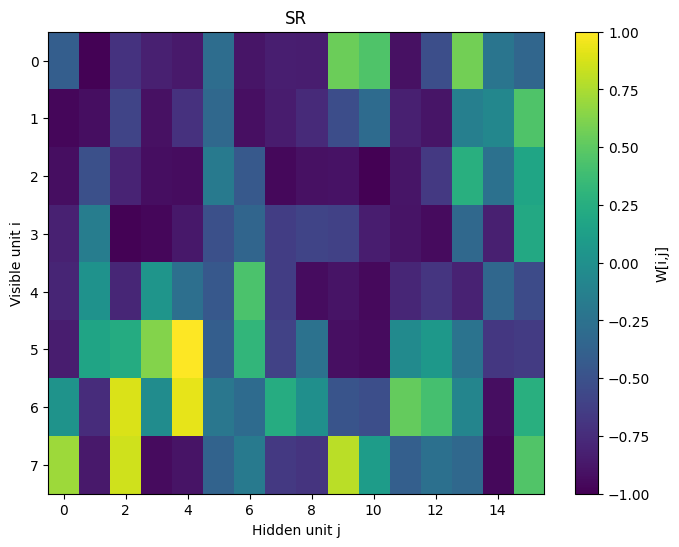

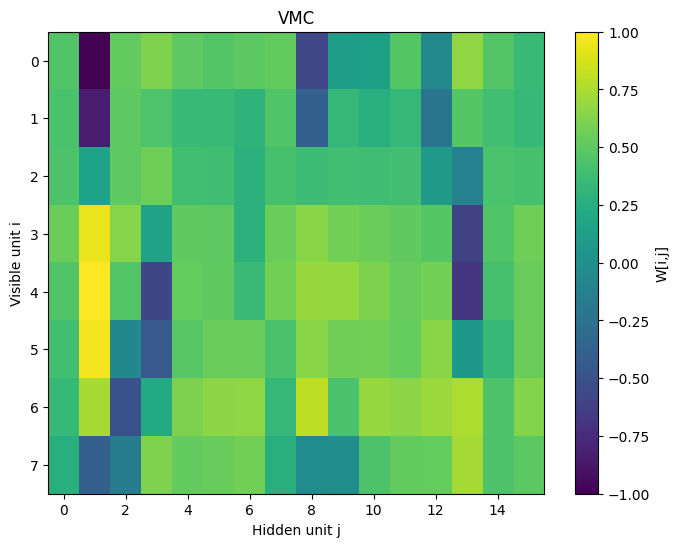

In [27]:
# Normalize weights to range [-1, 1]
def normalize(arr):
    arr_min = arr.min()
    arr_max = arr.max()
    if arr_max == arr_min:
        return np.zeros_like(arr)
    return 2 * (arr - arr_min) / (arr_max - arr_min) - 1

weights = wave_2.W.numpy()
weights = np.abs(weights)
weights = normalize(weights)

weights_vmc = wave_4.W.numpy()
weights_vmc = np.abs(weights_vmc)
weights_vmc = normalize(weights_vmc)

plt.figure(figsize=(8,6))
plt.imshow(weights, aspect="auto", interpolation="nearest")
plt.colorbar(label="W[i,j]")
plt.xlabel("Hidden unit j")
plt.ylabel("Visible unit i")
plt.title("SR")
plt.figure(figsize=(8,6))
plt.imshow(weights_vmc, aspect="auto", interpolation="nearest")
plt.colorbar(label="W[i,j]")
plt.xlabel("Hidden unit j")
plt.ylabel("Visible unit i")
plt.title("VMC")
plt.show()

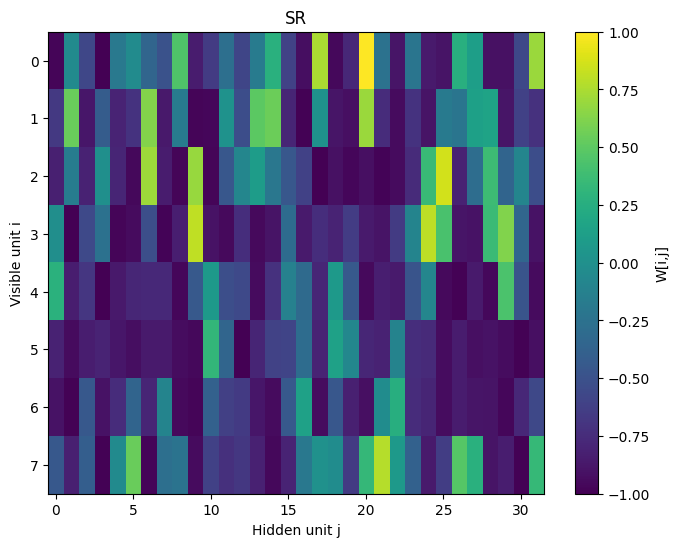

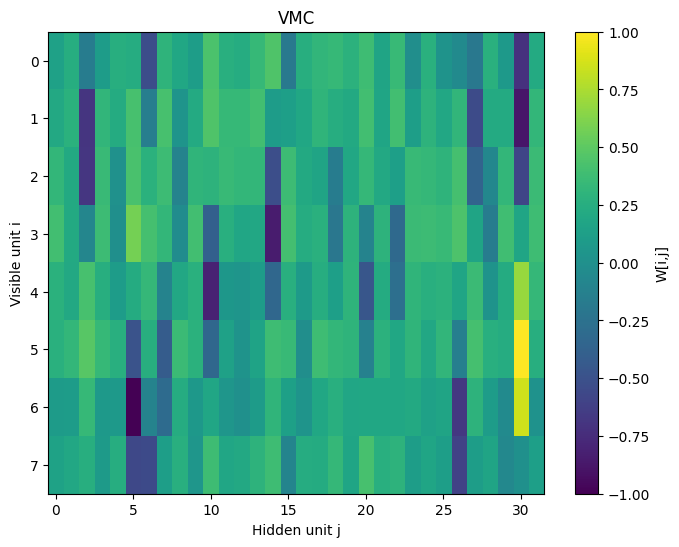

In [28]:
weights = wave_1.W.numpy()
weights = np.abs(weights)
weights = normalize(weights)

weights_vmc = wave_3.W.numpy()
weights_vmc = np.abs(weights_vmc)
weights_vmc = normalize(weights_vmc)

plt.figure(figsize=(8,6))
plt.imshow(weights, aspect="auto", interpolation="nearest")
plt.colorbar(label="W[i,j]")
plt.xlabel("Hidden unit j")
plt.ylabel("Visible unit i")
plt.title("SR")
plt.figure(figsize=(8,6))
plt.imshow(weights_vmc, aspect="auto", interpolation="nearest")
plt.colorbar(label="W[i,j]")
plt.xlabel("Hidden unit j")
plt.ylabel("Visible unit i")
plt.title("VMC")
plt.show()

/tmp/ipykernel_182730/3632179824.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


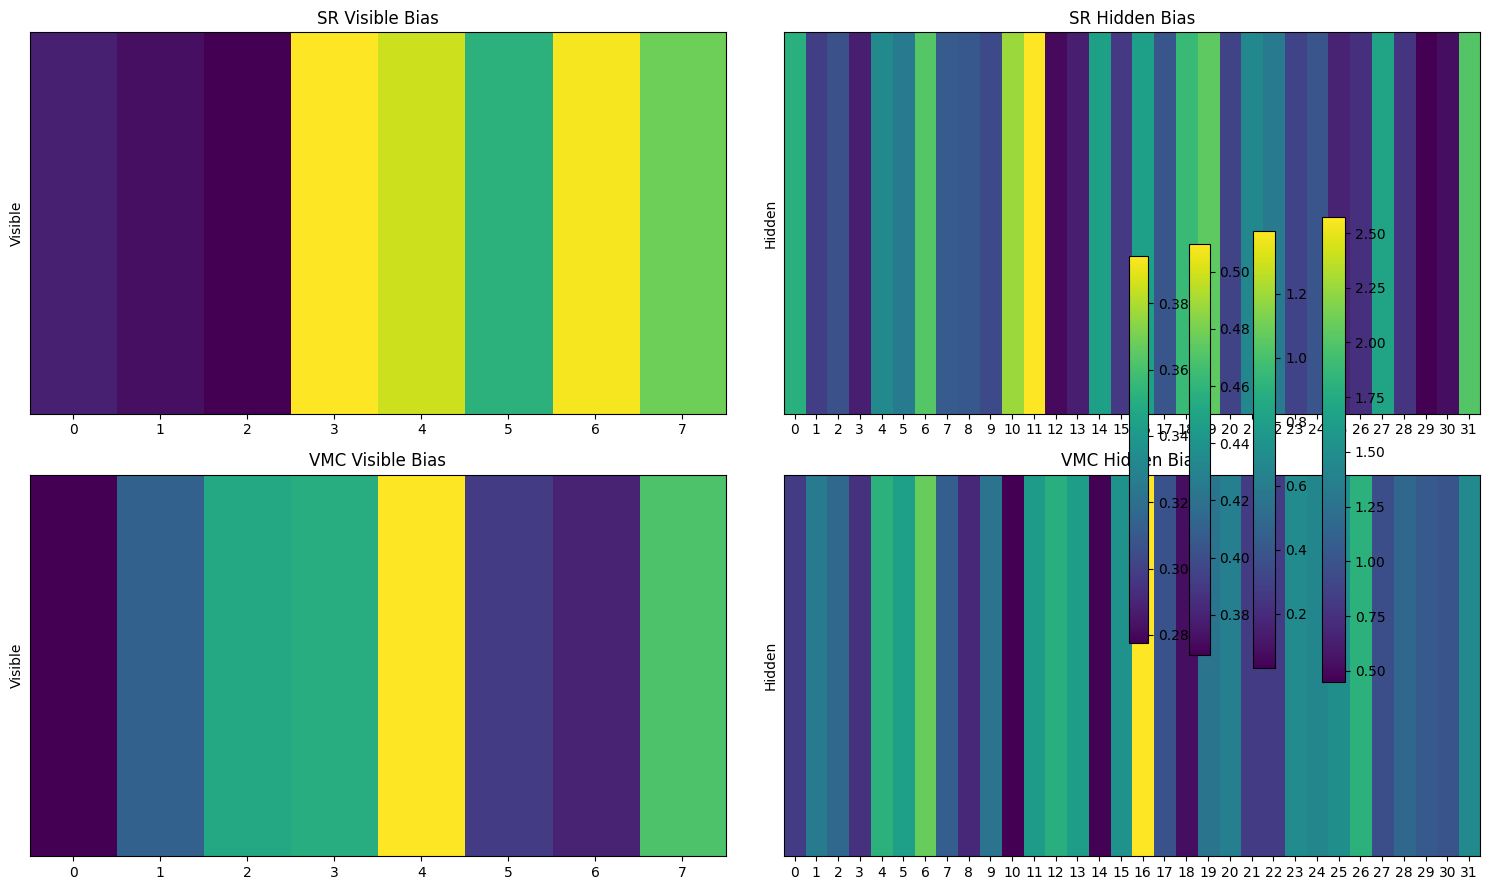

In [38]:
# Plot hidden and visible biases as colormaps using their magnitude

fig, axs = plt.subplots(2, 2, figsize=(15, 9))

# SR: density = 2
axs[0, 0].imshow(np.abs(wave_1.a.numpy())[np.newaxis, :], aspect="auto", cmap="viridis")
axs[0, 0].set_title("SR Visible Bias")
axs[0, 0].set_ylabel("Visible")
axs[0, 0].set_xticks(range(len(a_2)))
axs[0, 0].set_yticks([])

axs[1, 0].imshow(np.abs(wave_3.a.numpy())[np.newaxis, :], aspect="auto", cmap="viridis")
axs[1, 0].set_title("VMC Visible Bias")
axs[1, 0].set_ylabel("Visible")
axs[1, 0].set_xticks(range(len(a_2)))
axs[1, 0].set_yticks([])

# VMC: density = 2
axs[0, 1].imshow(np.abs(wave_1.b.numpy())[np.newaxis, :], aspect="auto", cmap="viridis")
axs[0, 1].set_title("SR Hidden Bias")
axs[0, 1].set_ylabel("Hidden")
axs[0, 1].set_xticks(range(len(b_4)))
axs[0, 1].set_yticks([])

axs[1, 1].imshow(np.abs(wave_3.b.numpy())[np.newaxis, :], aspect="auto", cmap="viridis")
axs[1, 1].set_title("VMC Hidden Bias")
axs[1, 1].set_ylabel("Hidden")
axs[1, 1].set_xticks(range(len(b_4)))
axs[1, 1].set_yticks([])

plt.colorbar(axs[0, 0].images[0], ax=axs, orientation='vertical', fraction=0.02, pad=0.04)
plt.colorbar(axs[0, 1].images[0], ax=axs, orientation='vertical', fraction=0.02, pad=0.04)
plt.colorbar(axs[1, 0].images[0], ax=axs, orientation='vertical', fraction=0.02, pad=0.04)
plt.colorbar(axs[1, 1].images[0], ax=axs, orientation='vertical', fraction=0.02, pad=0.04)
plt.tight_layout()
plt.show()